# Notebook donde se desarrolla el entrenamiento local con una parte de los datos

**Cargar las librerias**

In [19]:
import sys

if ".." not in sys.path:
    sys.path.append("..")

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Cargar los datos**


In [20]:

# Cargar archivo numpy dependiendo del fold
fold = 0

x_local = np.load(f'../data/x_train_fold_{fold}.npy')
y_local = np.load(f'../data/y_train_fold_{fold}.npy')


x_local.shape, y_local.shape


((12000, 28, 28, 1), (12000,))

In [21]:

# Cargar los datos de prueba
x_test = np.load('../data/x_test.npy')
y_test = np.load('../data/y_test.npy')
x_test.shape, y_test.shape

((10000, 28, 28, 1), (10000,))

<Sequential name=sequential_7, built=True>
Epoch 1/5


d:\claseCloud\federated-models\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2445 - loss: 2.0482 - val_accuracy: 0.7180 - val_loss: 0.8885
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7879 - loss: 0.7052 - val_accuracy: 0.8684 - val_loss: 0.4532
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8681 - loss: 0.4648 - val_accuracy: 0.9057 - val_loss: 0.3376
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8978 - loss: 0.3459 - val_accuracy: 0.9130 - val_loss: 0.2962
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9175 - loss: 0.2839 - val_accuracy: 0.9097 - val_loss: 0.2934
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.99      0.97      0.98      1135
           2       0.92      0.87      0.89      1032
           3       0.74      0.98      0.84      1010
           4       0.98      0.83      0.90       982
         

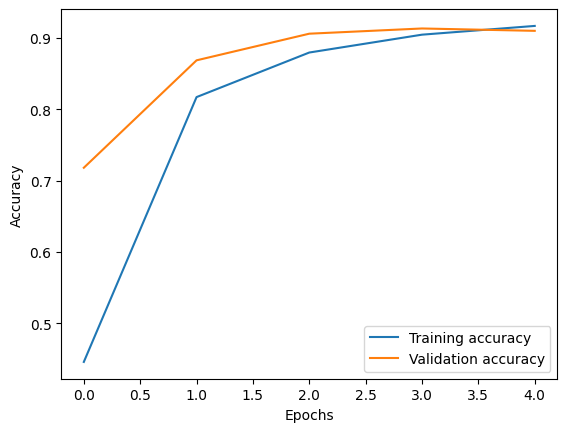

In [22]:
from sklearn.metrics import classification_report
from src.modelG import build
def train_and_verify(local_model, x_local, y_local, epochs, x_test, y_test, save_name):

    print(local_model)

    history = local_model.fit(x_local, y_local, epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    local_model.save(save_name)

# Entrenamientos locales. Cada uno de estos deben hacerse en computadoras aparte.
from tqdm import tqdm

local_model = build.build_it()
train_and_verify(local_model, x_local, y_local, 5, x_test, y_test, f"../models/lmodel_{fold}.keras")

# Curvas de aprendizaje

## Fold 0
![alt text](path/to/image.png)